Gabe Darley

Homework 2

CMPS 3240-01

1. a) When considering a positive ray, there are N + 1 possible dichotomies in this data set (as defined by the book). When looking for our k, we find that at k = 2, substituting k in for N in the N + 1 expression yields a smaller value (3) than the value of 2 ^ k (4). Therefore our breakpoint is k = 2. Considering the positive ray could not even shatter two points (e.g. if left point is positive and right point is negative), the VCD = 1.

   b) When considering a positive interval, there are ( 1/2 * ( N ^ 2 ) ) + ( 1/2 * N ) + 1 possible dichotomies in this data set (as defined by the book). When looking for our k, we find that at k = 3, substituting k in for N in the dichotomy expressions yields a smaller value (7) than the value of 2 ^ k (8). Therefore our breakpoint is k = 3. This means that the VCD = 2 (i.e. this is the maximum number of dichotomies which the positive interval can shatter).
   
   c) When considering a convex set, there are 2 ^ N possible dichotomies in thie data set (as defined by the book). With this equation, there is no way for 2 ^ N to not equal 2 ^ k, therefore we can know that there will be no breakpoint (or k = inifinity). This means the VCD also is infinity, considering there will be no number of data points which the convex set could not shatter.

 2. a) For a set of 4 points where no one point can be shattered, there can only be a maximum of one dichotomy. Therefore, B(4, 1) = 1.
 
 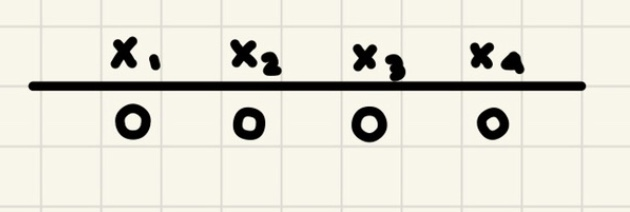
    
    b) For a set of 4 points where no two points can be shattered, there can be a maximum of five dichotomies. Therefore, B(4, 2) = 5.
    
 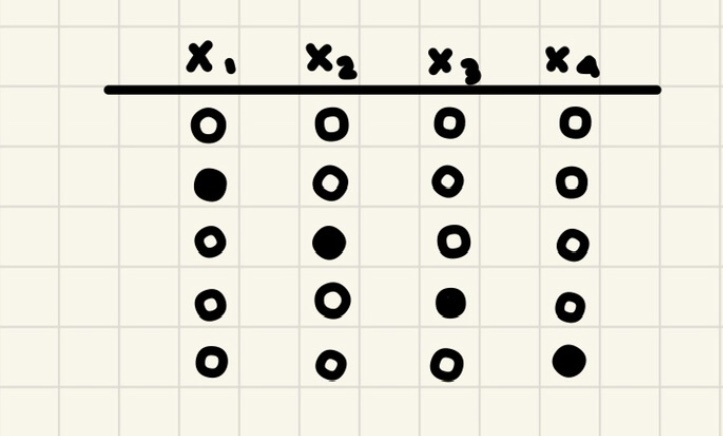 
  
    c) For a set of 5 points where no two points can be shattered, there can be a maximum of six dichotomies. Therefore, B(5, 2) = 6.
    
  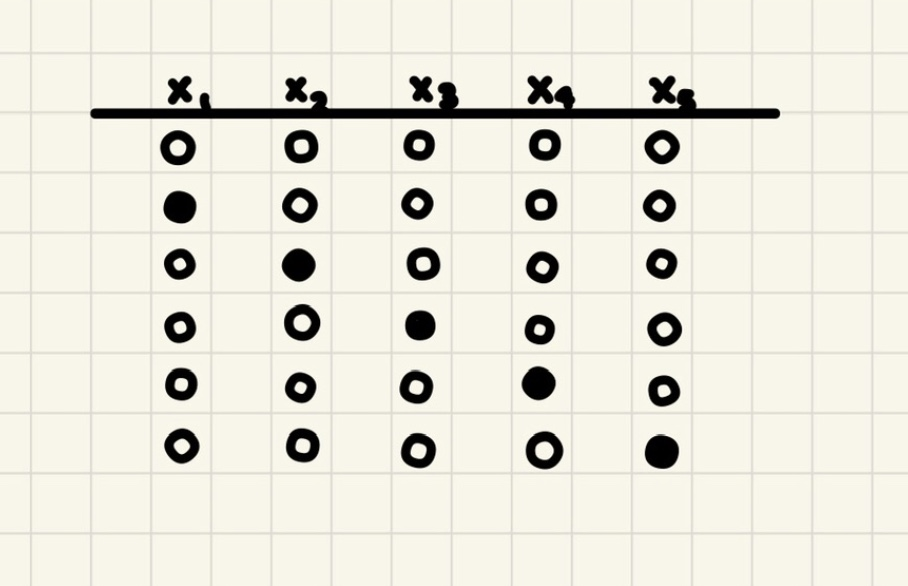
    
    Now let's consider our claim that B(5, 2) <= B(4, 2) + B(4, 1). Substituting in the values we generated, we have 6 <= 5 + 1. The claim holds true.

3. a)


AVERAGE G BAR = 0.061379
AVERAGE VARIANCE = 0.956519
AVERAGE BIAS = 0.205548
AVERAGE E OUT = 1.883349


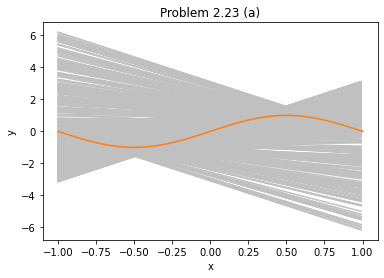

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Function for generating target function y values
def target(x):
    sin_arg = math.pi * x
    return math.sin(sin_arg)

#Function for generating hypothesis slope
def g_slope(x1, y1, x2, y2):
    num = y1 - y2
    denom = x1 - x2
    return (num / denom)

#Function for generating hypothesis y-int
def g_intercept(x1, y1, x2, y2):
    num = (x1 * y2) - (x2 * y1)
    denom = x1 - x2
    return (num / denom)


#Generate x and y values of target function
line_x = np.linspace(-1, 1)
line_y = []

for i in line_x:
    line_y.append(target(i))

#Graph target function
plt.clf()
plt.plot(line_x, line_y)

#Create variable for keeping track of hypotheses
g_values = []

#Begin sampling two data points at a time
for a in range(1000):
    N = 2
    # D = a

    # Generate 2 random training data points
    X = np.random.uniform(-1, 1, size = N)
    Y = []

    for b in X:
        Y.append(target(b))

    slope = g_slope(X[0], Y[0], X[1], Y[1])
    intercept = g_intercept(X[0], Y[0], X[1], Y[1])

    x_vals = np.arange(-1, 1, 0.01)
    new_funct = intercept + (slope * x_vals)
    plt.plot(x_vals, new_funct, 'silver')
    g_values.append(new_funct)


#Graph the target function on top of the hypotheses
plt.plot(line_x, line_y)

#Create lists to hold averages for each point in X
gbars = []
variances = []
bias = []
eouts = []

#Calculate mean, variance, and bias for every indidivual point
for point in range(len(x_vals)):
    point_vals = []
    for function in g_values:
        point_vals.append(function[point])
    this_bias = (np.mean(point_vals) - target(x_vals[point])) ** 2
        
    gbars.append(np.mean(point_vals))
    variances.append(np.var(point_vals))
    bias.append(this_bias)
    eouts.append(this_bias + np.var(point_vals))

#Show averages across all X values
print('')
print('AVERAGE G BAR = %f' %  (np.mean(gbars)))
print('AVERAGE VARIANCE = %f' %  (np.mean(vars)))
print('AVERAGE BIAS = %f' %  (np.mean(bias)))
print('AVERAGE E OUT = %f' %  (np.mean(eouts)))

#Plot specs -- Graph a
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 2.23 (a)')

plt.show()

c)


AVERAGE G BAR = -0.007581
AVERAGE VARIANCE = 0.956519
AVERAGE BIAS = 0.500057
AVERAGE E OUT = 0.749296


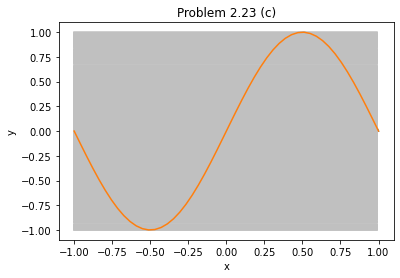

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Function for generating target function y values
def target(x):
    sin_arg = math.pi * x
    return math.sin(sin_arg)

#Function for generating new hypothesis intercept
def g_intercept(y1, y2):
    num = y1 + y2
    return (num / 2)


#Generate x and y values of target function
line_x = np.linspace(-1, 1)
line_y = []

for i in line_x:
    line_y.append(target(i))

#Graph target function
plt.clf()
plt.plot(line_x, line_y)

#Create variable for keeping track of hypotheses
g_values = []

#Begin sampling two data points at a time
for a in range(1000):
    N = 2
    # D = a

    # Generate 2 random training data points
    X = np.random.uniform(-1, 1, size = N)
    Y = []

    for b in X:
        Y.append(target(b))

    intercept = g_intercept(Y[0], Y[1])

    x_vals = np.arange(-1, 1, 0.01)
    new_funct = intercept + (0 * x_vals)
    plt.plot(x_vals, new_funct, 'silver')
    g_values.append(new_funct)


#Graph the target function on top of the hypotheses
plt.plot(line_x, line_y)

#Create lists to hold averages for each point in X
gbars = []
variances = []
bias = []
eouts = []

#Calculate mean, variance, and bias for every indidivual point
for point in range(len(x_vals)):
    point_vals = []
    for function in g_values:
        point_vals.append(function[point])
    this_bias = (np.mean(point_vals) - target(x_vals[point])) ** 2
        
    gbars.append(np.mean(point_vals))
    variances.append(np.var(point_vals))
    bias.append(this_bias)
    eouts.append(this_bias + np.var(point_vals))

#Show averages across all X values
print('')
print('AVERAGE G BAR = %f' %  (np.mean(gbars)))
print('AVERAGE VARIANCE = %f' %  (np.mean(vars)))
print('AVERAGE BIAS = %f' %  (np.mean(bias)))
print('AVERAGE E OUT = %f' %  (np.mean(eouts)))

#Plot specs -- Graph a
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 2.23 (c)')

plt.show()